# CS97 HW3 - Binary Classification Comparative Methods

For this project we're going to attempt the binary classification of a dataset using multiple methods and compare results.

Our goals for this project is to introduce you to several of the most common classification techniques, how to perform them and tweak parameters to optimize the outcome, how to produce and interpret results, and compare performance. You will be asked to analyze your findings and provide explanations for the observed performance.

Specifically you will be asked to classify whether a <b>patient is suffering from heart disease</b> based on a host of potential medical factors.

<b><u>DEFINITIONS</b></u>


<b> Binary Classification:</b>
In this case a complex dataset has an added 'target' label with one of two options. Your learning algorithm will try to assign one of these labels to the data.

<b> Supervised Learning:</b>
The data is fully supervised, which means it's been fully labeled and we can trust the veracity of the labeling. The target is to predict the label.

## 0.1. Background: The Dataset

For this exercise we will be using a subset of the UCI Heart Disease dataset, leveraging the fourteen most commonly used attributes. All identifying information about the patient has been scrubbed.

The dataset includes 14 columns. The information provided by each column is as follows:
<ul>
    <li><b>age:</b> Age in years</li>
    <li><b>sex:</b> (1 = male; 0 = female)</li>
    <li><b>cp:</b> Chest pain type (0 = asymptomatic; 1 = atypical angina; 2 = non-anginal pain; 3 = typical angina)</li>
    <li><b>trestbps:</b> Resting blood pressure (in mm Hg on admission to the hospital)</li>
    <li><b>cholserum:</b> Cholestoral in mg/dl</li>
    <li><b>fbs:</b> Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)</li>
    <li><b>restecg:</b> Resting electrocardiographic results (0= showing probable or definite left ventricular hypertrophy by Estes' criteria; 1 = normal; 2 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV))</li>
    <li><b>thalach:</b> Maximum heart rate achieved</li>
    <li><b>exang:</b> Exercise induced angina (1 = yes; 0 = no)</li>
    <li><b>oldpeakST:</b> Depression induced by exercise relative to rest</li>
    <li><b>slope:</b> The slope of the peak exercise ST segment (0 = downsloping; 1 = flat; 2 = upsloping)</li>
    <li><b>ca:</b> Number of major vessels (0-4) colored by flourosopy</li>
    <li><b>thal:</b> 1 = normal; 2 = fixed defect; 3 = reversable defect</li>
    <li><b><u>Sick:</u></b> Indicates the presence of Heart disease (True = Disease; False = No disease). It is the label.</li>
</ul>
    


## 0.2. Loading Essentials and Helper Functions

In [90]:
#Here are a set of libraries we imported to complete this assignment.
#Feel free to use these or equivalent libraries for your implementation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph
import os
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import itertools

%matplotlib inline

import random
random.seed(42)

In [91]:
# Helper function allowing you to export a graph
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [92]:
# Helper function that allows you to draw nicely formatted confusion matrices
def draw_confusion_matrix(y, yhat, classes):
    '''
        Draws a confusion matrix for the given target and predictions
        Adapted from scikit-learn and discussion example.
    '''
    plt.cla()
    plt.clf()
    matrix = confusion_matrix(y, yhat)
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    num_classes = len(classes)
    plt.xticks(np.arange(num_classes), classes, rotation=90)
    plt.yticks(np.arange(num_classes), classes)

    fmt = 'd'
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

## [20pt] Part 1.  Load the Data and Analyze

### 1.1. Let's first load our dataset (heartdisease.csv) so we'll be able to work with it.

In [93]:
'''NOTE FROM TA's'''
'''Please use this website https://htmtopdf.herokuapp.com/ipynbviewer/
  to convert ipynb file of this colab (File -> download as ipynb) to pdf,
  instead of ctrl+p this page because it will not format beutifully
  and it'll be difficult for us to grade'''

data = pd.read_csv('https://drive.google.com/uc?id=1Madtt_YvvLiHLjaC1KpOReO1V9ClQw6t') # heartdisease.csv

### 1.2. Now that our data is loaded, let's take a closer look at the dataset we're working with. Use the head method and the describe method to display some of the rows and undertand the summary of statistics.

In [94]:
'''Your code goes below here'''
# Hint: use the head() method

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,False
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,False
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,False
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,False
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,False


In [95]:
'''Your code goes below here'''
# Hint: use the describe() method

data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


### 1.3. Sometimes data will be stored in different formats (e.g., string, date, boolean), but many learning methods work strictly on numeric inputs. Call the info method to determine the datafield type for each column. Are there any that are problemmatic and why?

In [96]:
'''Your code goes below here'''

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  sick      303 non-null    bool   
dtypes: bool(1), float64(1), int64(12)
memory usage: 31.2 KB


**Your answer:** need to change bools into ints for SICK but its our target so thats not a problem (Hint: we can handle numeric variables, such as int and float, but we cannot directly handle bool)

### 1.4. Determine whether we're dealing with any null value (NaN). If so, report on which columns?

In [97]:
'''Your code goes below here'''
# Hint: isnull() (from HW1)

data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
sick        0
dtype: int64

**Your answer:** None of the columns contain null values

### 1.5. Before we begin our analysis we need to fix the field(s) that will be problematic. We replace our boolean 'sick' variable into a numeric variable, named as 'target'.

In [98]:
data['target'] = (data['sick']).astype(int)
del data['sick']

### 1.6. We also want to make sure we are dealing with a balanced dataset. In this case, we want to confirm whether or not we have an equitable number of  sick and healthy individuals to ensure that our classifier will have a sufficiently balanced dataset to adequately classify the two. Let's count the number of sick and healthy individuals and report your results. Then answer whether it is balanced or not.

In [99]:
'''Your code goes below here'''

data['target'].value_counts()

target
0    165
1    138
Name: count, dtype: int64

**Your answer:** Thats pretty balanced imo

### 1.7. If the dataset is imbalanced, can you name one possible solution to address it? (This question does not mean this dataset is balanced or imbalanced, it is an independent question)

**Your answer:** SMOTE, create synthetic samples from instances in the smaller class to balance the larger class



### 1.8. Now that we have our dataframe prepared, let's start analyzing our data. For this next question let's look at the correlations of our features to our target value. (hint: one possible approach you can use is corr() method from HW1)

In [100]:
'''Your code goes below here'''

print(data.corr()['target'].sort_values(ascending=False))

target      1.000000
exang       0.436757
oldpeak     0.430696
ca          0.391724
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
chol        0.085239
fbs         0.028046
restecg    -0.137230
slope      -0.345877
thalach    -0.421741
cp         -0.433798
Name: target, dtype: float64


## [25pt] Part 2. Prepare the Data and run a KNN Model

Before running our various learning methods, we need to do some additional preparation to finalize our data. We will save the label as a separate dataframe and split the dataset into training set and test set. Then, you wil prepare 2 batches of data: one is simply the raw data that hasn't gone through any additional pre-processing; the other will be the data after preprocessing. We will then feed both of these datasets into a classifier to showcase how important this step can be.

### 2.1. Save the label column as a separate array (let's name it as data_target) and then drop the label column from the dataframe.

In [101]:
'''Your code goes below here'''
# Hint: drop() (check HW1)

data_target = data['target']
del data['target']

### 2.2. First Create your "raw" unprocessed training data by dividing your dataframe into training and testing cohorts, with your training cohort consisting of 80% of your total dataframe (hint: use the train_test_split method)

In [102]:
train_raw, test_raw, target_raw, target_raw_test = train_test_split(data, data_target, test_size = 0.2, random_state = 30)

### 2.3. Output the resulting shapes of your training and testing samples to confirm that your split was successful. How many training samples and test samples do you have?

In [103]:
print(train_raw.shape, target_raw.shape)
print(test_raw.shape, target_raw_test.shape)

(242, 13) (242,)
(61, 13) (61,)


**Your answer:** 242 training, 61 testing

### 2.4. In lecture we learned about K-Nearest Neighbor. One thing we noted was because KNN's rely on Euclidean distance, they are highly sensitive to the relative magnitude of different features. Let's see that in action! Implement a K-Nearest Neighbor algorithm on our data. For this initial implementation simply use the default setting (K=5). Refer to the [KNN Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) for details on implementation. Report on the accuracy of the resulting model.

In [104]:
''' Hint:
1.) create KNeighborsClassifier() object
2.) fit data
3.) use the predict() method to predict the test data, and assign to variable "raw_predicted" since we will use "raw_predicted" in below cells
'''
'''Your code goes below here'''

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_raw, target_raw)
raw_predicted = knn.predict(test_raw)

mse = metrics.mean_squared_error(target_raw_test, raw_predicted)
print(mse)

0.39344262295081966


### 2.5. Print the accuracy, precision, recall, f1-score of the model, and draw the confusion matrix.

Accuracy:    0.606557
Precision:   0.500000
Recall:      0.791667
F1 Score:    0.612903


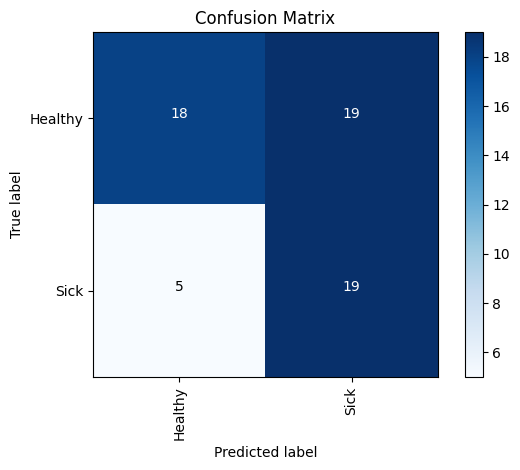

In [105]:
def print_four_metrics(target, predicted):
    print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(target, predicted)))
    print("%-12s %f" % ('Precision:', metrics.precision_score(target, predicted, labels=None, pos_label=1, average='binary', sample_weight=None)))
    print("%-12s %f" % ('Recall:', metrics.recall_score(target, predicted, labels=None, pos_label=1, average='binary', sample_weight=None)))
    print("%-12s %f" % ('F1 Score:', metrics.f1_score(target, predicted, labels=None, pos_label=1, average='binary', sample_weight=None)))

print_four_metrics(target_raw_test, raw_predicted)
draw_confusion_matrix(target_raw_test, raw_predicted, ['Healthy', 'Sick'])

### 2.6. Now try to improve k-NN's performance by data preprocessing. You can drop the top-1, or top-2, or top-3 useless features according to the correlation matrix we have obtained (the 1/2/3 features that are most negatively correlated with the label), normalize the numerical features, use one-hot encoding for the categorical features, etc. Please refer to HW1 for data preprocessing. Note you don't need to do data augmentation. Your f1-score need to be higher than 0.85 to get the full score for this question.

#### Pipeline / preprocessing process. Please name the data after preprocessing as "improved_data".

In [106]:
'''Hint: As long as you follow all the strategies in the above instructions, your f1-score will be higher than 0.85.'''
'''Your code goes below here'''

# Pipeline / preprocessing process. Please name the data after preprocessing as "improved_data".



numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer


useless_features = ['fbs']
improved_data = data.drop(useless_features, axis = 1)

for useless_feature in useless_features:
    if useless_feature in numerical_features:
        numerical_features.remove(useless_feature)
    elif useless_feature in categorical_features:
        categorical_features.remove(useless_feature)

full_pipeline = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(categories='auto'), categorical_features)
])

improved_data = full_pipeline.fit_transform(improved_data)

#### take a look at your prepared data

In [107]:
improved_data.shape

(303, 28)

### 2.7. Now split your pipelined data into an 80/20 split and again run the same KNN, draw the same confusion matrix. Discuss how you improved the performance.

#### Split your data

In [108]:
train, test, target, target_test = train_test_split(improved_data, data_target, test_size = 0.2, random_state = 30)

#### Run KNN as before. Do not change the default k=5 in k-NN.

In [109]:
''' Hint:
1.) create KNeighborsClassifier() object
2.) fit data
3.) use the predict() method to predict the test data, and assign to variable "predicted" since we will use "predicted" in below cells
'''
'''Your code goes below here'''

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train, target)
predicted = knn.predict(test)

#### Report accuracy, precision, recall, f1-score, and draw the confusion matrix as before

Accuracy:    0.918033
Precision:   0.880000
Recall:      0.916667
F1 Score:    0.897959


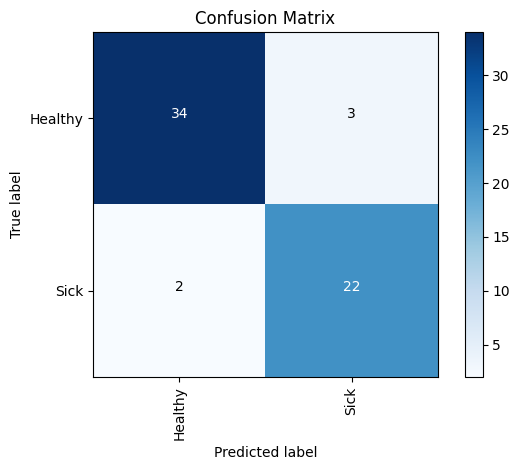

In [110]:
print_four_metrics(target_test, predicted)
draw_confusion_matrix(target_test, predicted, ['Healthy', 'Sick'])

**Your answer:** [Explain what strategies you used to improve the performance]

### 2.8. Model Selection on K.  As discussed in class, the KNN Algorithm includes an n_neighbors (k) attribute that specifies how many neighbors to use when developing the cluster. (The default value is 5, which is what your previous model used.) Lets now try n_neighbors (k) values of: 1, 2, 3, 5, 7, 9, 10, 20, and 200. Run your model for each value and print the f1-score for each. What is the best k among these choices?

In [111]:
k_values = [1, 2, 3, 5, 7, 9, 10, 20, 200]

for k in k_values:
    # Hint: when creating the KNN object, assign parameter "n_neighbors" to k
    # referece: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
    # Hint: you only need to print the f1-score. You do not need to print other metrics. You can use the improved_data after your preprocessing
    '''Your code goes below here'''
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train, target)
    predicted = knn.predict(test)
    print("k = %d, f1-score = %f" % (k, metrics.f1_score(target_test, predicted, labels=None, pos_label=1, average='binary', sample_weight=None)))

k = 1, f1-score = 0.695652
k = 2, f1-score = 0.702703
k = 3, f1-score = 0.846154
k = 5, f1-score = 0.897959
k = 7, f1-score = 0.857143
k = 9, f1-score = 0.840000
k = 10, f1-score = 0.816327
k = 20, f1-score = 0.840000
k = 200, f1-score = 0.750000


**Your answer:**

## [45pt] Part 3. Additional Learning Methods

So we have a model that seems to work well. But let's see if we can do better! You can continue using the data you preprocessed.

### [25pt] 3.1. Logistic Regression

Let's now try another classifier we introduced in lecture, one that's well known for handling linear models: Logistic Regression.

### 3.1.1. Implement a logistical regression classifier. Review the [Logistical Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for how to implement the model. Print accuracy, precision, recall, f1-score, plot the ROC curve, and report the area under the ROC curve.

In [112]:
'''
1.) create LogisticRegression() object
2.) fit your train data
3.) use the predict() method to predict the test data, and assign to variable "log_predicted"
4.) use predict_proba(test)[:,1] and assign to variable "log_score"
  NOTE: predict() returns the predicted classification (0 or 1),
  while predict_proba() returns the predicted probability (a float between 0 and 1)
  NOTE: predict_proba() will return
  [probability of data belonging to class 0, probability of data belonging to class 1]
  and we want to get probability of data belonging to class 1. That's why we slice
  the array by only getting the column 1
'''
'''Your code goes below here'''

# import LogisticRegression
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(train, target)
log_predicted = log_model.predict(test)
log_score = log_model.predict_proba(test)[:,1]


Accuracy:    0.901639
Precision:   0.821429
Recall:      0.958333
F1 Score:    0.884615


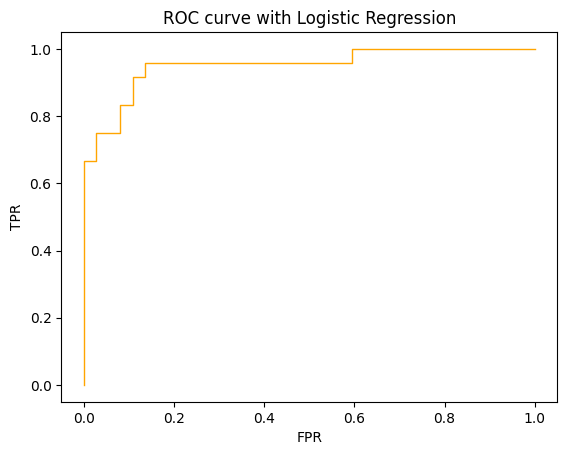

AUC of ROC:  0.9515765765765766


In [113]:
# Print the performance, plot the ROC curve, and print the area under ROC
def plot_roc_curve(target, score):
    fpr_log_reg, tpr_log_reg, thresholds = metrics.roc_curve(target, score)
    plt.figure(1)
    plt.plot(fpr_log_reg, tpr_log_reg, color='orange', lw=1)
    plt.title("ROC curve with Logistic Regression")
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()
    # Print the area under ROC, which is also called "AUC (Area Under the ROC curve)"
    aucroc = metrics.auc(fpr_log_reg, tpr_log_reg)
    print('AUC of ROC: ', aucroc)

print_four_metrics(target_test, log_predicted)
plot_roc_curve(target_test, log_score)

### 3.1.2. Let's tweak a few settings. The default model is using the L2-regularization (ridge). Let's set penalty to None and rerun your model. Let's see how your results change!

In [114]:
'''
1.) create LogisticRegression() object, while specify its parameter "penalty" to None
2.) fit your train data
3.) use the predict() method to predict the test data, and assign to variable "log_predicted"
4.) use predict_proba(test)[:,1] and assign to variable "log_score"
'''
'''Your code goes below here'''

from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(penalty=None)
log_model.fit(train, target)
log_predicted = log_model.predict(test)
log_score = log_model.predict_proba(test)[:,1]

In [115]:
# Print accuracy, precision, recall, and F1 score
print_four_metrics(target_test, log_predicted)

Accuracy:    0.885246
Precision:   0.793103
Recall:      0.958333
F1 Score:    0.867925


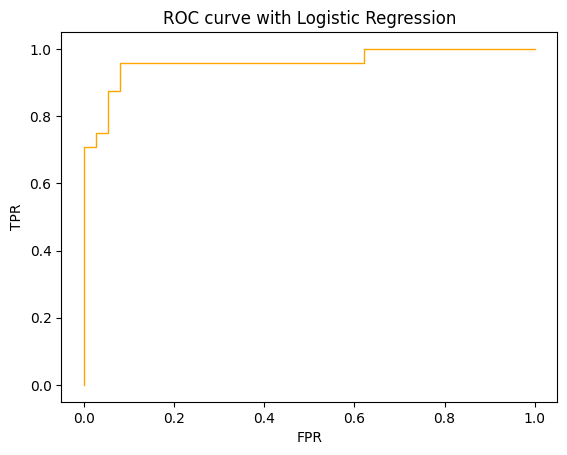

AUC of ROC:  0.9594594594594595


In [116]:
# Plot ROC curve and print the area under ROC
plot_roc_curve(target_test, log_score)

### 3.1.3 Rerun your logistic classifier, but modify the penalty = 'l1', solver = 'liblinear', and again report the results.

Accuracy:    0.885246
Precision:   0.793103
Recall:      0.958333
F1 Score:    0.867925


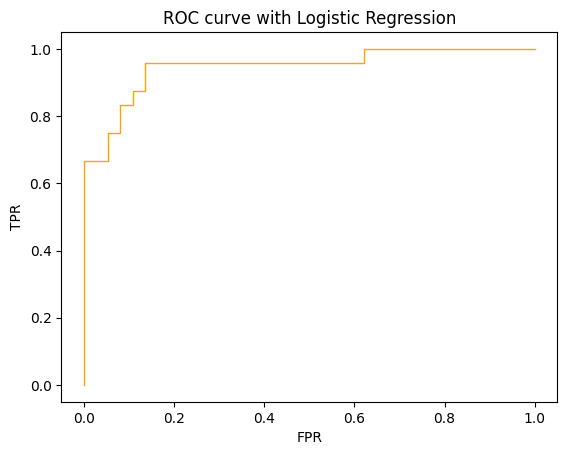

AUC of ROC:  0.9470720720720721


In [117]:
''' repeat the same process as 3.1.3 but change parameters as the question specifies'''
'''Your code goes below here'''
# Run logistic regression here

log_model = LogisticRegression(penalty='l1', solver='liblinear')
log_model.fit(train, target)
log_predicted = log_model.predict(test)
log_score = log_model.predict_proba(test)[:,1]

# Print accuracy, precision, recall, and F1-score. Feel free to use the print_four_metrics function

print_four_metrics(target_test, log_predicted)

# Plot ROC curve and print the area under ROC. Feel free to use the plot_roc_curve function

plot_roc_curve(target_test, log_score)

# fpr_log_reg, tpr_log_reg, thresholds = metrics.roc_curve(target_test, log_score)

# area = metrics.auc(fpr_log_reg, tpr_log_reg)
# print('AUC of ROC: ', area)


###  3.1.4. We played around with different penalty terms (none, L1 etc.) Print the parameters of your model that uses the L1-norm (LASSO). Describe the purpose of using a penalty term. (Whether it improves your results depend on your preprocessing, so it is fine if it does not improve your results)

In [118]:
# Hint: Use print(your_model_name.coef_) to print the parameters of your model.
# Do you see any zero? Those are related to the penalty term.
'''Your code goes below here'''

print(log_model.coef_)


[[-0.04046606  0.21840919  0.20880612 -0.27239723  0.51728686 -0.1390342
   0.97479951  1.2651916   0.17319946 -0.62274487 -0.47380109  0.
  -0.16873098  0.          0.          0.50546052  0.          0.2210572
  -0.78227566 -1.72631568  0.          0.2459643   0.          0.
   0.          0.         -0.45175845  0.88474912]]


**Your answer:** yes i see some zeros

### [20pt] 3.2. SVM (Support Vector Machine)

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. Given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane to classify the data. In two dimentional space this hyperplane is a line.

### 3.2.1 Implement a Support Vector Machine classifier on your pipelined data. Review the [SVM Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) for how to implement a model. For this implementation you can simply use the default settings, but set probability = True.

In [119]:
'''
1.) create SVC() object, while specify its parameter "probability" to "True"
2.) fit your train data
3.) predict the test data. and assign to a variable
  because we will use it in the next cell
4.) use svm.predict_proba(test)[:,1] and assign to a variable
  bacause we will use it in the next cell
'''
'''Your code goes below here'''

from sklearn.svm import SVC

svm_model = SVC(probability=True)
svm_model.fit(train, target)
svm_predicted = svm_model.predict(test)
svm_score = svm_model.predict_proba(test)[:,1]


### 3.2.2 Print the accuracy, precision, recall, F1 Score, plot the ROC curve, and print and the area under ROC Curve of the resulting model.

Accuracy:    0.836066
Precision:   0.750000
Recall:      0.875000
F1 Score:    0.807692


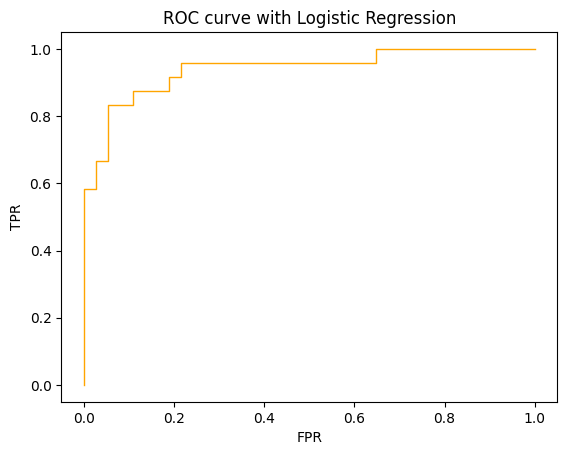

AUC of ROC:  0.9403153153153153


In [120]:
# Feel free to use print_four_metrics and plot_roc_curve functions
'''Your code goes below here'''

print_four_metrics(target_test, svm_predicted)
plot_roc_curve(target_test, svm_score)

### 3.2.3.  Rerun your SVM, but now modify the kernel to 'linear'. Again print your accuracy, precision, recall, F1-score, plot the new ROC curve, and report the area under the ROC curve.

In [121]:
# run SVM
'''
1.) create SVC() object like 3.2.2, but change parameter 'kernel' to 'linear' as the question specifies
2.) fit your train data
3.) predict the test data. and assign to a variable
  because we will use it in below cell
4.) use svm.predict_proba(test)[:,1] and assign to a variable
  bacause we will use it in below cell
'''
'''Your code goes below here'''

from sklearn.svm import SVC

svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(train, target)
svm_predicted = svm_model.predict(test)

Accuracy:    0.868852
Precision:   0.766667
Recall:      0.958333
F1 Score:    0.851852


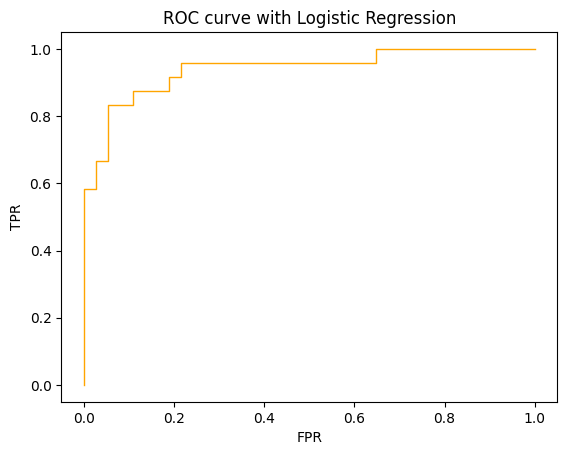

AUC of ROC:  0.9403153153153153


In [122]:
''' repeat the same process as 3.2.2'''
'''Your code goes below here'''

print_four_metrics(target_test, svm_predicted)
plot_roc_curve(target_test, svm_score)

#### Comparing the default kernel ("rbf") and the "linear" kernel, which one is better? You can look up the [SVM kernel's documentation](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html#sphx-glr-auto-examples-svm-plot-svm-kernels-py). Is the decision boundary more like a linear hyperplane or a circle? (You can just draw the conclusion from which kernel is better)

**Your answer:** The better kernel is Linear, they both seem to have the exact same AUC, but the linear kernel has a significantly higher F1 score.

## [10pt + bonus 10pt] Part 4: Cross Validation and Model Selection

You have practiced a number of different classification techniques. Based on these experiments you should have settled on a particular model that performs most optimally on the chosen dataset.

Before our work is done though, we want to ensure that our results are not the result of the random sampling of our data we did with the train-test split. We will conduct a k-fold cross-validation of our top two performing models, assess their cumulative performance across folds, and determine the best model for this dataset.

### [10pt] 4.1. Select your top 2 performing models and run a K-Fold Cross Validation on both (use 10 folds). Replace the corresponding code in the cell below. Report your best performing model. You can use accuracy to select the best-performing model.

In [135]:
from sklearn import model_selection

# First we define our cross-validation model parameters. In this case we're going to use KFold, with 10 splits
# where we first shuffle our data before splitting it, and use a random seed to ensure a consistent repeatable shuffle
kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)

# replace the two models below with what you picked
log_model_kfold = LogisticRegression(solver="liblinear")
svc_model_kfold = SVC(probability = True)

# Finally we pull it all together. We call cross val score to generate an accuracy performance score for our model
# we define our learning model, data, labels, and cross-val splitting strategy (all defined previously)
log_results_kfold = model_selection.cross_val_score(log_model_kfold, train, target, cv=kfold)
svc_results_kfold = model_selection.cross_val_score(svc_model_kfold, train, target, cv=kfold)

# Because we're collecting results from all runs, we take the mean value
print("For Logistic Regression our mean accuracy across folds is: %.2f%%" % (log_results_kfold.mean() * 100.0))
print("For an SVM Regression our mean accuracy across folds is: %.2f%%" % (svc_results_kfold.mean() * 100.0))

For Logistic Regression our mean accuracy across folds is: 84.23%
For an SVM Regression our mean accuracy across folds is: 84.23%


**Your answer:** best accuracy of 84.23% from Logistic Regression. `LogisticRegression(solver='liblinear')`

### [bonus 10pt] 4.2. use 10-fold cross validation to select the best hyperparameter $\lambda$ (1/C) in logistic regression with l2 penalty. What is the best $\lambda$ you find?

In [152]:
'''
  This is similar to 4.1
  Hint: create a bunch of lambdas value
  then you can use a loop,
  assign parameter "C" to be "1 / (lambda)"
  and print out cross_val_score().
  Also, specify which lambda is the best one in your opinion
'''
'''Your code goes below here'''

lambdas = [0.001, 0.01, 0.1, 1, 10, 100]

kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)

for lambda_ in lambdas:
    log_model_kfold = LogisticRegression(C=1/lambda_, max_iter=1000)
    log_results_kfold = model_selection.cross_val_score(log_model_kfold, train, target, cv=kfold)
    print("For lambda = %f our mean accuracy across folds is: %.2f%%" % (lambda_, log_results_kfold.mean() * 100.0))



For lambda = 0.001000 our mean accuracy across folds is: 81.75%
For lambda = 0.010000 our mean accuracy across folds is: 82.57%
For lambda = 0.100000 our mean accuracy across folds is: 83.00%
For lambda = 1.000000 our mean accuracy across folds is: 84.23%
For lambda = 10.000000 our mean accuracy across folds is: 83.40%
For lambda = 100.000000 our mean accuracy across folds is: 82.18%


**Your answer:** Best accuracy of 84.23% when lambda is 1